For a 100×100 matrix with 85% sparsity:
Theoretical optimal stride: 2.58
Practical stride values to consider: [2, 3, 5, 7, 11, 13, 666]

Recommended stride: 2


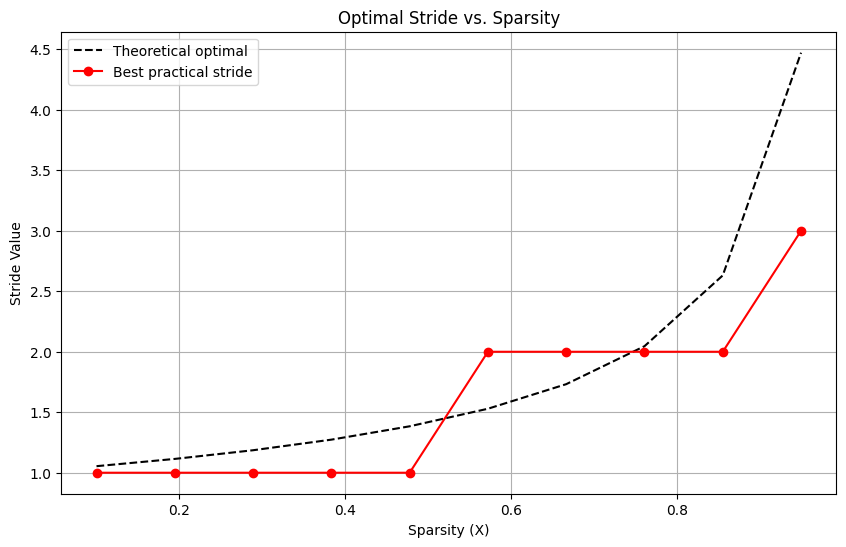

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

def calculate_optimal_stride(matrix_size, sparsity):
    """
    Calculate the optimal stride for a sparse matrix.
    """
    if sparsity >= 1.0:
        raise ValueError("Sparsity must be less than 1.0 to avoid division by zero.")
    
    optimal_stride = 1 / np.sqrt(1 - sparsity)
    
    practical_strides = set()
    closest = max(1, int(round(optimal_stride)))
    practical_strides.add(closest)
    
    for stride in [2, 3, 5, 7, 11, 13]:
        if stride < matrix_size // 2:
            practical_strides.add(stride)
    
    matrix_based = max(1, int(matrix_size / (1 - sparsity)))
    practical_strides.add(matrix_based)
    
    return optimal_stride, sorted(practical_strides)

def evaluate_stride_quality(matrix_size, sparsity, strides):
    """
    Evaluate and score different stride values for a given matrix size and sparsity.
    """
    non_zeros = int(matrix_size * matrix_size * (1 - sparsity))
    results = []
    
    for stride in strides:
        strided_positions = (matrix_size // stride) ** 2
        coverage = min(1.0, strided_positions / non_zeros)
        regularity_penalty = 0.2 if matrix_size % stride == 0 else 0
        efficiency = coverage - max(0, (strided_positions - non_zeros) / (matrix_size * matrix_size))
        score = coverage + efficiency - regularity_penalty
        
        results.append({'stride': stride, 'coverage': coverage, 'efficiency': efficiency, 'score': score})
    
    results.sort(key=lambda x: x['score'], reverse=True)
    return results, results[0]['stride']

def visualize_stride_evaluation(matrix_size, sparsity_levels=None):
    """
    Visualize how different stride values perform across sparsity levels.
    """
    if sparsity_levels is None:
        sparsity_levels = np.linspace(0.1, 0.95, 10)
    
    results = []
    for sparsity in sparsity_levels:
        optimal, practical = calculate_optimal_stride(matrix_size, sparsity)
        eval_results, best = evaluate_stride_quality(matrix_size, sparsity, practical)
        results.append({'sparsity': sparsity, 'optimal_stride': optimal, 'best_practical': best})
    
    plt.figure(figsize=(10, 6))
    plt.plot(sparsity_levels, [r['optimal_stride'] for r in results], 'k--', label='Theoretical optimal')
    plt.plot(sparsity_levels, [r['best_practical'] for r in results], 'ro-', label='Best practical stride')
    plt.xlabel('Sparsity (X)')
    plt.ylabel('Stride Value')
    plt.title(f'Optimal Stride vs. Sparsity')
    plt.grid(True)
    plt.legend()
    return results

def demo(output_file):
    matrix_size = 100
    sparsity = 0.85
    
    optimal_stride, practical_strides = calculate_optimal_stride(matrix_size, sparsity)
    print(f"For a {matrix_size}×{matrix_size} matrix with {sparsity*100:.0f}% sparsity:")
    print(f"Theoretical optimal stride: {optimal_stride:.2f}")
    print(f"Practical stride values to consider: {practical_strides}")
    
    results, best_stride = evaluate_stride_quality(matrix_size, sparsity, practical_strides)
    print(f"\nRecommended stride: {best_stride}")
    
    visualize_stride_evaluation(matrix_size)
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    output_file='perfect_stride.png'  
    demo(output_file)
